## 필수과제1.1
> 스코어에 대한 분포도 확인하여, 한쪽에 치우친 분포인지도 체크하기!

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('../dataset/2019-Dec.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB


In [6]:
weights = {
    'view':1,
    'cart':3,
    'purchase':5
}
event_df = df.loc[df['event_type'].isin(['view','cart','purchase'])]
event_df['score'] = event_df['event_type'].map(weights)
product_scores = event_df.groupby('product_id')['score'].sum().reset_index()

## 추천지수가 높은 제품 상위 10개 출력
product_scores=product_scores.sort_values(by='score', ascending=False)
product_scores

/var/folders/1l/w3vzbf215cs4ll30rh71l7wr6ghggx/T/ipykernel_56531/2550288251.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_df['score'] = event_df['event_type'].map(weights)


,product_id,score
17481,5809910,52253
16049,5802432,20129
7136,5700037,20017
28944,5854897,17311
17483,5809912,16946
...,...,...
6238,5691801,1
6239,5691806,1
41258,5905774,1
41260,5905779,1


In [7]:
product_scores['score'].describe()

count   44081.000
mean      126.485
std       466.296
min         1.000
25%        11.000
50%        37.000
75%       106.000
max     52253.000
Name: score, dtype: float64

* score 의 요약값을 확인해 볼 때 평균이 126, 중앙값이 37으로 매우 왼쪽으로 치우쳐진 (오른쪽 꼬리) 형태를 보임

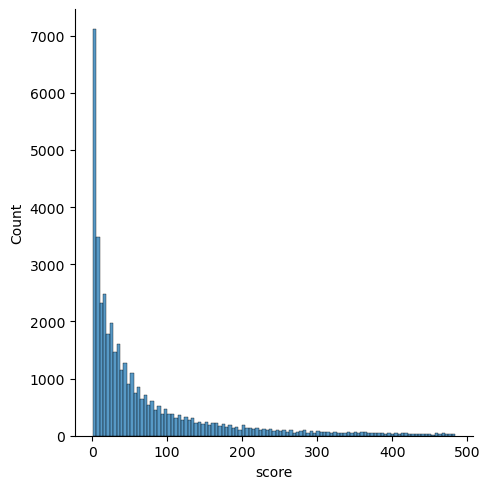

In [8]:
# 이상치 제거 후 시각화
plot_df = product_scores.loc[product_scores['score']<product_scores['score'].quantile(.95)]
sns.displot(plot_df['score'])